# Regression

We will look at SPY data (stock exchange) and perform regression to do the folloing. 


1. Import libraries and load the data into the environment.

2. Generate the features of the model that are related with some measure of volatility, price and volume. 

3. Visualize the correlation between the features and target variable with scatterplots.

4. Create the train and test dataset and fit the model using the linear regression algorithm. 

5. Make predictions, obtain the performance of the model, and plot the results.



## Step 1: Import Libraries and load the data into enviroment. 

First we need to import the required libraries into python. 

In [1]:
import pandas as pd # data reading 
from datetime import datetime # Internal 
import numpy as np # Arithmitic 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt # Plotting 

First we have to sue the `read_csv()` method to get the csv file into the enviroment. 

In [25]:
file_name = 'SPY_regression.csv'
data = pd.read_csv(filepath_or_buffer=file_name)
data.head(15)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
5,2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,4.245030e+09,2080.409912
6,2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,1.466840e+09,2090.110107
7,2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2.852940e+09,2088.870117
8,2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,3.884930e+09,2089.139893
9,2015-11-23,2089.409912,2095.610107,2081.389893,2086.590088,3.587980e+09,2086.590088


In [27]:
# Need to change the datetime to python readable
data['Date'] = pd.to_datetime(data['Date'])
data.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close,New Date
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068,2015-12-07
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2015-12-04
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2015-12-03
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2015-12-02
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2015-12-01
5,2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,4.245030e+09,2080.409912,2015-11-30
6,2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,1.466840e+09,2090.110107,2015-11-27
7,2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2.852940e+09,2088.870117,2015-11-25
8,2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,3.884930e+09,2089.139893,2015-11-24
9,2015-11-23,2089.409912,2095.610107,2081.389893,2086.590088,3.587980e+09,2086.590088,2015-11-23


It is in descending order, so we will have to do some sorting. This is done with the pandas `sort_values()` method. Read more about it [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [8]:
data.set_index('Date', inplace=True)
data.sort_values('Date', ascending=True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3.991400e+09,1132.989990
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2.491020e+09,1136.520020
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4.972660e+09,1137.140015
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5.270680e+09,1141.689941
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4.389590e+09,1144.979980
...,...,...,...,...,...,...
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117


## Step 2: Feature generation

Features are basically the variables in the equation, and most often the columns. A different topic we will go overt another time is picking the right features. This is important because lets say you have a dataset with 200+ columns of data. You can not so simply say 'Regressio!' a la harry potter, since your computer is not a wizard. So for this example we choose 6 features. 
- High – Low percent change
- 5 periods Exponential Moving Average
- Standard deviation of the price over the past 5 days
- Daily volume percent change
- Average volume for the past 5 days
- Volume over close price ratio 

The crazy thing is that all of these are built in pandas functions. For each feature, below is the mathematical operations. 

- Subtract High from Low 
- [ewm](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) followed by the average function `.mean()`
- `std()`
- `pct_change()`
- `mean()`
- `std()`

In [37]:
SPY_data = data
SPY_data['High-Low_pct'] = (SPY_data['High'] - SPY_data['Low']).pct_change()
SPY_data['ewm_5'] = SPY_data["Close"].ewm(span=5).mean().shift(periods=1)
SPY_data['price_std_5'] = SPY_data["Close"].rolling(center=False,window= 30).std().shift(periods=1)
 
SPY_data['volume Change'] = SPY_data['Volume'].pct_change()
SPY_data['volume_avg_5'] = SPY_data["Volume"].rolling(center=False,window=5).mean().shift(periods=1)
SPY_data['volume Close'] = SPY_data["Volume"].rolling(center=False,window=5).std().shift(periods=1)


,Date,Open,High,Low,Close,Volume,Adj Close,New Date,High-Low_pct,ewm_5,price_std_5,volume Change,volume_avg_5,volume Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068,2015-12-07,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2015-12-04,0.802043,2077.070068,NaN,0.042309,NaN,NaN
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2015-12-03,0.001172,2085.841992,NaN,0.021728,NaN,NaN
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2015-12-02,-0.363191,2068.684262,NaN,-0.082631,NaN,NaN
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2015-12-01,-0.247413,2073.181111,NaN,-0.060375,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4.389590e+09,1144.979980,2010-01-08,0.187834,1140.955410,27.684594,0.031442,4.363246e+09,3.641617e+08
1489,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5.270680e+09,1141.689941,2010-01-07,0.214827,1142.296933,28.776698,0.200723,4.289418e+09,2.947408e+08
1490,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4.972660e+09,1137.140015,2010-01-06,-0.529625,1142.094603,29.628013,-0.056543,4.560514e+09,4.480121e+08
1491,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2.491020e+09,1136.520020,2010-01-05,0.330150,1140.443073,30.230101,-0.499057,4.720974e+09,4.158625e+08


## Step 3 Visualize the correlation
This is not necessary and honestly you don't need to know this so much at the moment, basically I create a function so that I can plot everything nice and neat. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

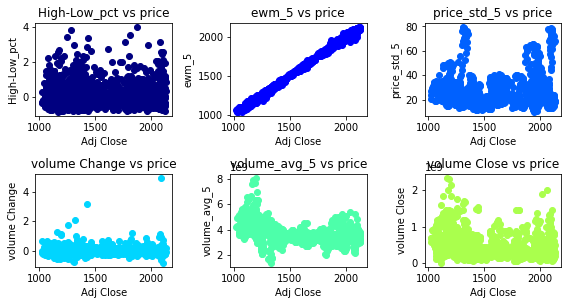

In [10]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
 
def correlation(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["Adj Close"], asset, c = next(colors))
        ax.set_xlabel("Adj Close")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs price")
    fig.tight_layout() 
    plt.show()
        
# Take the name of the last 6 columns of the SPY_data which are the model features
variables = SPY_data.columns[-6:]  
 
correlation(SPY_data,variables,3,3)

What is important thought, is to get the correlation matrix between the features and the target variable (close price). 

In [44]:
SPY_data.corr()['Adj Close'].loc[variables]

High-Low_pct    -0.010328
ewm_5            0.998513
price_std_5      0.100524
volume Change   -0.005446
volume_avg_5    -0.485734
volume Close    -0.241898
Name: Adj Close, dtype: float64

So what can we learn from this? 

## Step 4: Train dataset and fit model

We need to first get rid of all of the null values in the dataset. 
Or first we can actually count if there are any, and then get rid of those that exist. 

After we create two lists, the training data and testing data for the linear regression model to learn from.

You do not always need a testing set (basically it will check periodically how well it is doing from data it has not seen before), however it is good practice to do so. 

In [47]:
SPY_data.isnull().sum().loc[variables]

High-Low_pct      1
ewm_5             1
price_std_5      30
volume Change     1
volume_avg_5      5
volume Close      5
dtype: int64

In [13]:
SPY_data = SPY_data.dropna(axis=0)

In [52]:
train = SPY_data[SPY_data.index < datetime(year=2015, month=1, day=1)]

test = SPY_data[SPY_data.index >= datetime(year=2015, month=1, day=1)]
dates = test.index


TypeError: '<' not supported between instances of 'int' and 'datetime.datetime'

## Step 5: Make preictions and plot results

We fit the linear regression model with the data to predict teh close value. 

In [59]:
lr = LinearRegression()
 
X_train = train[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]]
 
Y_train = train["Adj Close"]
 
lr.fit(X_train,Y_train)  

LinearRegression()

We will see then how it does with the validation set, i.e., how well it predicts against values it has never seen before. 

In [61]:
# Create the test features dataset (X_test) which will be used to make the predictions.

X_test = test[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]].values 

# The labels of the model

Y_test = test["Adj Close"].values 

close_predictions = lr.predict(X_test)   

mae = sum(abs(close_predictions - test["Adj Close"].values)) / test.shape[0]

print(mae)


511.2113809125078


Whew, the mean error of the model is 18.09 so predictions were not so close.

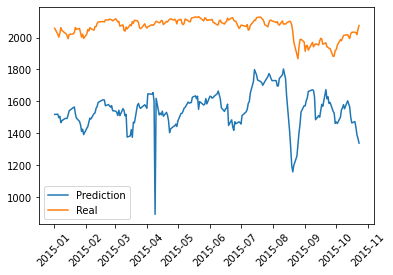

In [62]:

plt.plot(dates, close_predictions, label='Prediction')
plt.plot(dates, Y_test, label='Real')
plt.xticks(rotation=45)
plt.legend()